**lineare Regression**

In diesem Notizbuch wird die lineare Regression in 6 Beispielen demonstriert: <br>
(Hinweis: Interne Links sind nur gültig, wenn die verknüpfte Zelle bereits ausgeführt wird.) <br>
[Beispiel_1](#example_1): Wenige Datenpunkte mit schwachem Rauschen<br>
[Beispiel_2](#example_2): mehr Datenpunkte und stärkeres Rauschen<br>
[Beispiel_3](#example_3): Lineare Regression mit Ausreißern<br>
[Beispiel_4](#example_4): regulierte Regression mit Ridge-Regression und Lasso<br>
[Beispiel_5](#example_5): Regulierte Regression mit Polynom-Dataset<br>
[Beispiel_6](#example_6): Regulierte Regression mit übersteuertem polyfit<br>

***

<a id='calc_regression'></a>
### def calc_regression():
**function to define a linear model and fit the given data to the model**<br>
[sckit-learn.LinearModels](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)<br>

LinearRegression fits a linear model with coefficients $ \omega = \left\{\omega_1, ...,\omega_p\right\}$
to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:
$$\min\limits_{\omega}||X\omega - y||_2^2 $$
more information about the class LinearRegression: [class LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

in ``calc_regression()`` the linear model will be created and fit to the given datapoints. It is possible to do the fitting with all datapoints or with a part of them (training).<br> The fitted model will be used to predict values along the x-Axis of the given datapoints. The accuricy of the linear model is represented due to [score()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) and the two attributes ``coef_`` and ``intercept_``.
calc_regression() returns a dictionary containig the linear model and its datapoints as well as all information about the linear regression.


<a id='calc_regression'></a>
### def calc _Regression ():
**Funktion zum Definieren eines linearen Modells und Anpassen der übergebenen Daten an das Modell**<br>
[sckit-learn.LinearModels](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)<br>

LinearRegression passt ein lineares Modell mit den Koeffizienten $ \omega = \left\{\omega_1, ...,\omega_p\right\}$ an um
die verbleibende Quadratsumme zwischen den beobachteten Zielen im Datensatz zu minimieren und den durch die lineare Approximation vorhergesagten Zielen. Mathematisch löst es ein Problem der Form:
$$\min\limits_{\omega}||X\omega - y||_2^2 $$
Weitere Informationen zur Klasse LinearRegression: [Klasse LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In `` calc _Regression () `` wird das lineare Modell erstellt und an die übergebenen Datenpunkte angepasst. Es ist möglich, die Anpassung mit allen Datenpunkten oder mit einem Teil davon durchzuführen (Training).<br> Das angepasste Modell wird verwendet, um Werte entlang der x-Achse der angegebenen Datenpunkte vorherzusagen. Die Genauigkeit des linearen Modells wird durch [score()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) und die beiden Attribute ``coef_`` und ``intercept _`` angegeben.
``calc_Regression()``gibt ein dictionary zurück, das das lineare Modell und seine Datenpunkte sowie alle Informationen zur linearen Regression enthält.

In [1]:
def calc_regression(data_points, training=False, test_size=None):
    #
    # instanz der Klasse LinearRegression erzeugen
    reg_model = LinearRegression()
    #
    # die zurueckgegebene Datenmatrix in x und y Werte separieren:
    #
    # --> np.array.reshape(-1,1): -1: unbekannte Groesse der Reihe
    #                              1: 1 Spalte
    #                    result:  n x 1 dimensionaler Vertikalvektor mit nRows(=len(dataPoints)) 
    #
    X = data_points[:,0].reshape(-1,1)
    Y = data_points[:,1].reshape(-1,1)
    #
    # Regression mit Hilfe der kleinsten Fehlerquadrate:
    #
    # 2 Moeglichkeiten der Model-Anpassung:
    # - alle vorhandenen Datenpunkte in das Modell geben
    # - Datenpunkte in Trainings- und Testdaten unterteilen. 
    if training:
        # Daten in Trainings- und Testdaten teilen
        #
        # x% der Daten zum trainieren des linearen modells verwenden:
        # --> parameter: 'test_size'
        #
        # Parameter random_state auf einen festen Wert gesetzt, um immer das gleiche Ergebnis mit den gleichen Daten zu erhalten
        #
        if test_size == None:
            test_size = 0.2
        #
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=5)
        #
        # instanz von LinearRegression() erstellen und mit trainingdaten anpassen
        #
        reg_model = LinearRegression()
        reg_model.fit(X_train, Y_train)
    else:
        reg_model.fit(X,Y)
        #

    # Modelldaten fuer gegebene x-daten:
    predicted_values = reg_model.predict(X)
    #
    dict_lin_regression = {
        'model': reg_model,
        'X': X,
        'Y': Y,
        'y_predict': predicted_values,
        'coef': reg_model.coef_,
        'intercept': reg_model.intercept_,
        'score': reg_model.score(X,Y)}
    
    return(dict_lin_regression)

<a id='get_Data_Points'></a>
### def get _Daten_ Punkte ():
**Funktion zum Definieren eines zweidimensionalen Arrays mit Punkten aus einer linearen Funktion** <br>

Eingabeparameter:
- n_points (Anzahl der Datenpunkte)
- Steigung
- Achsenabschnitt
- xmax
- xmin (default: 0)

``get_Data_Points()`` gibt ein zweidimensionales numpy-Array mit Punkten der linearen Funktion zurück: y = Steigung * x + Achsenabschnitt.
- Spalte_0: x-Werte von xmin ... xmax mit linear verteiltem Abstand
- Spalte_1: y-Werte gemäß der linearen Funktion mit den Parametern Steigung und Achsenabschnitt
(Spaltengroesse haengt von der Anzahl der Datenpunkte ab)

In [2]:
def get_Data_Points(n_points, slope, intercept, xmax, xmin=0):
    #
    data_points = empty([n_points, 2])
    data_points[:,0] = linspace(xmin, xmax, n_points)
    data_points[:,1] = data_points[:,0]*slope + intercept
    #
    return(data_points)

<a id='create_noiseVec'></a>
### def create_noise_vec():
**Funktion zum Definieren eines Vektors mit Rauschen** <br>

Eingabeparameter:
- Rauschen
- n_length (Laenge des Vektors)
- Rauschtyp (default: 'Gauß')
- n_columns (default: 2)

Zufallsgenerator:
numpy.random

In [3]:
def create_noise_vec(distortion, n_length, noise_type='gaussian', n_columns=2):
    #
    # vektor der Länge 'n_length' mit Rauschen erzeugen
    #
    if noise_type == 'gaussian':
        mu = 0 # parameter µ hat keinen Effekt auf das Rauschverhalten
        noise_vec = random.normal(mu, distortion, [n_length, n_columns]) 
    #
    return(noise_vec)

<a id='example_1'></a><br>**Example 1**

simple dataset with a few points and not much noise.

Create dataset using function [get_Data_Points()](#get_DataPoints) und [create_noise_vec()](#create_noiseVec). The predefined parameters allow following linear function:<br>
- $y = 0.45 \bullet x + 0.5$
- total number of points:    20
- x-range: 0...10
<br>
- distortion: 0.4

After regression is computed with [calc_regression](#calc_regression) the predicted values are plotted together with the noisy datapoints and the 'true' linear function.

more info about linear regression: [sckit-learn.LinearModels](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)<br>

<a id='example_1'></a><br> **Beispiel 1**

Datensatz mit wenigen Punkten und geringem Rauschen.

Datensatz mit [get_Data_Points()](#get_DataPoints) und [create_Noise_vec()](#create_NoiseVec) erzeugen. Die Voreinstellungen generieren folgende Funktion:<br>
- $y = 0.45 \cdot x + 0.5$
- Gesamtzahl der Punkte: $\quad$20
- x-Bereich: $\quad$0 ... 10
- Verzerrung: $\quad$0,4

Nachdem die Regression mit [calc_Regression](#calc_Regression) berechnet wurde, werden die vorhergesagten Werte zusammen mit den verrauschten Datenpunkten und der 'wahren' linearen Funktion in einem Diagramm dargestellt.

Weitere Informationen zur linearen Regression: [sckit-learn.LinearModels](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)<br>

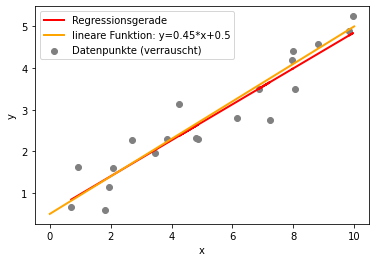

In [4]:
from numpy import random, empty, linspace
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
#
# durch den integer-Wert wird der Zufallsgenerator immer die gleichen Ergebnisse liefern, wenn der code neu ausgeführt wird.
random.seed(0)
#
#
x_min = 0
x_max = 10
#
n_points = 20 
#
slope = 0.45 #Steigung 
#
intercept = 0.5 #Achsenabschnitt
#
clear_linear_data = get_Data_Points(n_points, slope, intercept, x_max, x_min)
#
# Rauschen erzeugen:
noise_data = create_noise_vec(0.4, n_points)
#
# lineare Funktion verzerren:
data = clear_linear_data + noise_data
#
# lineare Regression durchfuehren:
dict_reg = calc_regression(data)
#
#---------------------------------------------------------------------
# Daten anzeigen
# 
x_points = dict_reg["X"]
y_points = dict_reg["Y"]
#
y_predict = dict_reg["y_predict"]
#
# alle Datenpunkte (geringes Rauschen)
plt.scatter(x_points, y_points, color='gray', label="Datenpunkte (verrauscht)")
# Regressionsgerade
plt.plot(x_points, y_predict, color='red', linewidth=2, label="Regressionsgerade")
# lineare Funktion (y = m*x + b)
plt.plot(clear_linear_data[:,0], clear_linear_data[:,1], color='orange', lw=2, label="lineare Funktion: y={}*x+{}".format(slope, intercept))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

<a id='example_2'></a><br> **Beispiel 2**

mehr Datenpunkte und stärkeres Rauschen:

Datensatz mit [get_Data_Points()](#get_DataPoints) und [create_Noise_vec()](#create_NoiseVec) erzeugen. Die Voreinstellungen generieren folgende Funktion:<br>
- $y = 0.45 \cdot x + 0.5$
- Gesamtzahl der Punkte: $\quad$200
- x-Bereich: $\quad$0 ... 10
- Verzerrung: $\quad$4.0

Nachdem die Regression mit [calc_Regression](#calc_Regression) berechnet wurde, werden die vorhergesagten Werte zusammen mit den verrauschten Datenpunkten und der 'wahren' linearen Funktion in einem Diagramm dargestellt.

Weitere Informationen zur linearen Regression: [sckit-learn.LinearModels](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)<br>

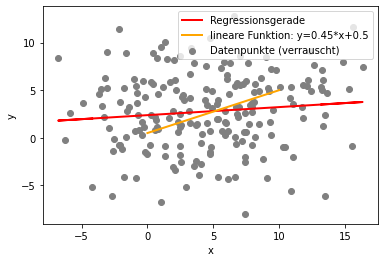

In [5]:
#
x_min = 0
x_max = 10
#
n_points = 200 
#
slope = 0.45 #(m)
#
intercept = 0.5 #(b)
#
clear_lineardata = get_Data_Points(n_points, slope, intercept, x_max, x_min)
#
# Rauschen erzeugen:
noise_vec = create_noise_vec(4.0, n_points)
#
# lineare Funktion verzerren:
noisy_data = clear_lineardata + noise_vec
#
# lineare Regression durchfuehren:
dict_reg = calc_regression(noisy_data)
#
# --------------------------------------
# Daten anzeigen
# 
x_points = dict_reg["X"]
y_points = dict_reg["Y"]
#
y_predicted = dict_reg["y_predict"]
#
# alle Datenpunkte
plt.scatter(x_points, y_points, color='gray', label="Datenpunkte (verrauscht)")
# Regressionsgerade
plt.plot(x_points, y_predicted, color='red', linewidth=2, label="Regressionsgerade")
# lineare Funktion (y = m*x + b)
plt.plot(clear_lineardata[:,0], clear_lineardata[:,1], color='orange', lw=2, label="lineare Funktion: y={}*x+{}".format(slope, intercept))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

<a id='example_3'></a><br> **Beispiel 3**

#### Lineare Regression mit Ausreißern

Datensatz mit [get_Data_Points()](#get_DataPoints) und [create_Noise_vec()](#create_NoiseVec) erzeugen. Die Voreinstellungen generieren folgende Funktion:<br>
- $y = 0.45 \cdot x + 0.5$
- Gesamtzahl der Punkte: $\quad$1000
- x-Bereich: $\quad$0 ... 5
- Anzahl der Ausreißer-Punkte: $\quad$5
- Verzerrung: $\quad$0.6

Nachdem die Regression mit [calc_Regression](#calc_Regression) berechnet wurde, werden die vorhergesagten Werte zusammen mit den verrauschten Datenpunkten und der 'wahren' linearen Funktion in einem Diagramm dargestellt.

Weitere Informationen zur linearen Regression: [sckit-learn.LinearModels](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)<br>

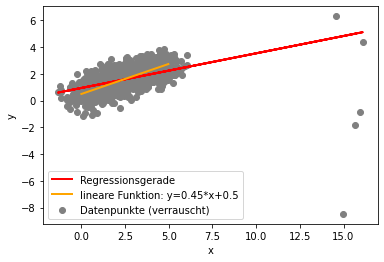

In [6]:
#
#
x_min = 0
x_max = 5
#
n_points = 1000  
#
slope = 0.45 #Steigung
#
intercept = 0.5 #Achsenabschnitt
#
n_outliers = 5 #Anzahl Ausreisser
#
distortion = 0.6 #Verzerrung
#
# --------------------------------------------------------------------------------
#
clear_lineardata = get_Data_Points((n_points + n_outliers), slope, intercept, x_max, x_min)
#
# Ausreisser zu den linearen Daten hinzufuegen
clear_lineardata[n_points:,0] = 15 + 0.5 * random.normal(size=(n_outliers))
clear_lineardata[n_points:,1] = -3 - 10 * random.normal(size=n_outliers)
#
# Rauschen erzeugen
noise_vec = create_noise_vec(distortion, (n_points + n_outliers))
# lineare Daten verzerren:
noisydata = clear_lineardata + noise_vec
#
# Regressionsgerade berechnen
dict_reg = calc_regression(noisydata)
#
######################################
# Daten anzeigen
#
# 
x_points = dict_reg["X"]
y_points = dict_reg["Y"]
#
y_predict = dict_reg["y_predict"]
#
# all points (with little noise)
plt.scatter(x_points, y_points, color='gray', label="Datenpunkte (verrauscht)")
# Regressionsgerade
plt.plot(x_points, y_predict, color='red', linewidth=2, label="Regressionsgerade")
# lineare Funktion (y = m*x + b)
plt.plot(clear_lineardata[0:n_points,0], clear_lineardata[0:n_points,1], color='orange', lw=2, label="lineare Funktion: y={}*x+{}".format(slope, intercept))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

<a id='regularized_regression'> **Regularisierte Regression** </a>

In den folgenden Beispielen werden 2 Methoden gezeigt:
- Ridge - Regression
- Lasso

###### Ridge-Regression
Die Ridge-Regression behebt einige der Probleme der Methode der kleinsten Fehlerquadrate, indem die Größe der Koeffizienten begrenzt wird. Die Koeffizienten minimieren eine limitierte Restsumme von Quadraten:
$$ \min\limits_{\omega} || X\omega-y||_2^2 + \alpha ||\omega||_2^2$$
Weitere Informationen zur Ridge-Regression:  [scikit-learn.ridge-regession:](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)<br>

###### Lasso
Lasso ist ein lineares Modell, das spärliche Koeffizienten schätzt. Es ist in einigen Bereichen nützlich, da es dazu neigt, Lösungen mit weniger Koeffizienten ungleich Null zu bevorzugen, wodurch die Anzahl der Merkmale, von denen die gegebene Lösung abhängig ist, effektiv verringert wird. Aus diesem Grund sind Lasso und seine Varianten für das Gebiet der komprimierten Erfassung von grundlegender Bedeutung.
Mathematisch besteht es aus einem linearen Modell mit einem zusätzlichen Regularisierungsterm. Die zu minimierende Zielfunktion ist:
$$ \min\limits_{\omega} \frac{1}{2n_{samples}} || X\omega-y||_2^2 + \alpha ||\omega||_1$$
 
Weitere Informationen zu Lasso: [scikit-learn.ridge-regession:](https://scikit-learn.org/stable/modules/linear_model.html#lasso)<br>

<a id="example_4"></a><br>
**Beispiel 4**<br>
regulierte Regression mit Ridge-regression und Lasso

In diesem Beispiel werden der Steigungs- und Achsenabschnitswert der Ridge- und Lasso-Regression in einem Histogramm angezeigt. Um die beiden Methoden zu demonstrieren, werden drei Datensätze mit unterschiedlichen Steigungen erstellt und an beide Modelle angepasst. Dieser Vorgang wird 1000 Mal wiederholt.

Funktionen:
- f1: $y=0.0\cdot x + 1.0$
- f2: $y=0.2\cdot x + 1.0$
- f3: $y=2.0\cdot x + 1.0$

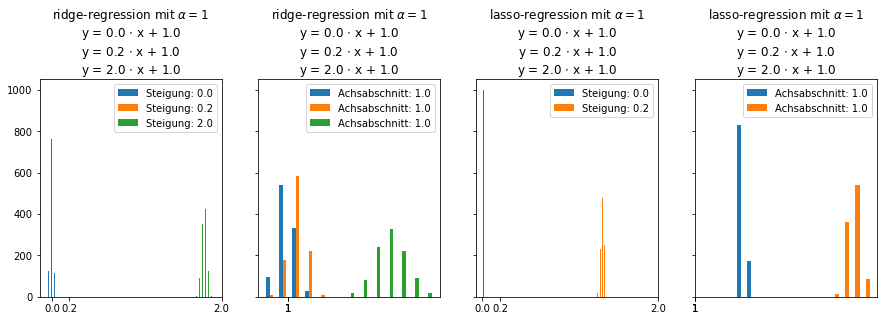

In [7]:
from numpy import random, empty, linspace
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
#
alpha = 1
#
x_min = 0
#
x_max = 5
#
n_points = 500
#
distortion= 0.5
#
n_repeats = 1000
#
slopes=[0.0, 0.2, 2.0]
#
intercept = [1.0, 1.0, 1.0]
#
coef_result = empty([n_repeats,6])
intercpt_result = empty([n_repeats,6])
#
ridgemodel = Ridge(alpha=alpha)
lassomodel = Lasso(alpha=alpha, max_iter=1e5)
#
for i in range(n_repeats):
    #
    noise = create_noise_vec(distortion, n_points)
    #
    set1 = get_Data_Points(n_points, slopes[0], intercept[0], x_max, x_min) + noise
    set2 = get_Data_Points(n_points, slopes[1], intercept[1], x_max, x_min) + noise
    set3 = get_Data_Points(n_points, slopes[2], intercept[2], x_max, x_min) + noise
    #
    # fit and analyse set1
    ridgemodel.fit(set1[:,0].reshape(-1,1), set1[:,1].reshape(-1,1))
    coef_result[i,0] = ridgemodel.coef_
    intercpt_result[i,0] = ridgemodel.intercept_
    #
    lassomodel.fit(set1[:,0].reshape(-1,1), set1[:,1].reshape(-1,1))
    coef_result[i,3] = lassomodel.coef_
    intercpt_result[i,3] = lassomodel.intercept_
    #
    # fit and analyse set2
    ridgemodel.fit(set2[:,0].reshape(-1,1), set2[:,1].reshape(-1,1))
    coef_result[i,1] = ridgemodel.coef_
    intercpt_result[i,1] = ridgemodel.intercept_
    #
    lassomodel.fit(set2[:,0].reshape(-1,1), set2[:,1].reshape(-1,1))
    coef_result[i,4] = lassomodel.coef_
    intercpt_result[i,4] = lassomodel.intercept_
    #
    # fit and analyse set3
    ridgemodel.fit(set3[:,0].reshape(-1,1), set3[:,1].reshape(-1,1))
    coef_result[i,2] = ridgemodel.coef_
    intercpt_result[i,2] = ridgemodel.intercept_
    #
    lassomodel.fit(set3[:,0].reshape(-1,1), set3[:,1].reshape(-1,1))
    coef_result[i,5] = lassomodel.coef_
    intercpt_result[i,5] = lassomodel.intercept_
    #
#----------------------------------------------------------------
#
# Ergebnisse anzeigen
#
# Steigungen:                     Achsenabschnitte:
# |--0..2--| ... |--3...5--|     |--0..2--| ... |--3...5--|
# |ridge() | ... | lasso()|      |ridge() | ... | lasso()|
# | set1-3 | ... | set1-3 |      | set1-3 | ... | set1-3 |
#
#
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,4), sharey=True)
axes[0].hist(coef_result[:,0:3], 55)
axes[1].hist(intercpt_result[:,0:3], 13)
axes[2].hist(coef_result[:,4:6], 55)
axes[3].hist(intercpt_result[:,4:6], 13)
#
axes[0].set_xticks(slopes)
# axes[0].set_ylim([0,1000])
axes[1].set_xticks(intercept)
axes[2].set_xticks(slopes)
axes[3].set_xticks(intercept)

#
str0 = r"ridge-regression mit $\alpha = {{{}}}$".format(alpha)
str0 += "\n"
str0 += r"y = {} $\cdot$ x + {}".format(slopes[0], intercept[0])
str0 += "\n"
str0 += r"y = {} $\cdot$ x + {}".format(slopes[1], intercept[1])
str0 += "\n"
str0 += r"y = {} $\cdot$ x + {}".format(slopes[2], intercept[2])
axes[0].set_title(str0)
axes[0].legend(['Steigung: %.1f'%slopes[0], 'Steigung: %.1f'%slopes[1], 'Steigung: %.1f'%slopes[2]])
axes[1].set_title(str0)
axes[1].legend(['Achsabschnitt: %.1f' %intercept[0], 'Achsabschnitt: %.1f' %intercept[1], 'Achsabschnitt: %.1f' %intercept[2]])
#
str1 = str0.replace('ridge', 'lasso')
axes[2].set_title(str1)
axes[2].legend(['Steigung: %.1f'%slopes[0], 'Steigung: %.1f'%slopes[1], 'Steigung: %.1f'%slopes[2]])
axes[3].set_title(str1)
axes[3].legend(['Achsabschnitt: %.1f' %intercept[0], 'Achsabschnitt: %.1f' %intercept[1], 'Achsabschnitt: %.1f' %intercept[2]])
#
plt.show()

<a id="example_5"></a> **Beispiel 5**

Regularisierte Regression mit Polynomdatensatz

Eine Polynomfunktion wird mit nur einer kleinen Menge von Datenpunkten dargestellt. Diese Trainingsdaten werden für verschiedene Regressionsmodelle verwendet. Das Ergebnis ist in den folgenden Diagrammen zu sehen:

Polynomfunktion:
$y= -10 \cdot x^3 - 2.3 \cdot x^2 + 0.1\cdot x -2$

Anzahl der Trainingspunkte (n_Punkte): $\quad$20<br>
x_ min: $\quad$-2<br>
x_max: $\quad$2<br>
Alpha Ridge: $\quad$2.0<br>
Alpha-Lasso: $\quad$2.0<br>
Grad Polyfit: $\quad$3<br>

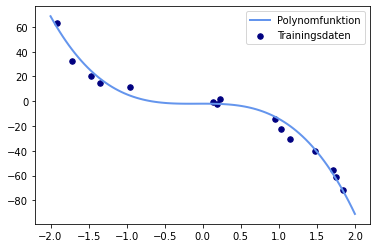

In [8]:
#
import matplotlib.pyplot as plt
from numpy import random, empty, linspace, sort, newaxis, poly1d, polyfit
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
#
# polynomfunktion: y = -10x³ - 2.3x² + 0.1x -2
#
def f(x):
    return(-10*x**3 - 2.3*x**2 +0.1*x -2)

#
x_min=-2
x_max=2
#
n_points = 15
#
alpha_ridge = 2.0
alpha_lasso = 2.0
degree_polyfit = 3
#
#
x_0 = linspace(x_min,x_max,100)
x_plot = linspace(x_min,x_max,100)
#
# aus den 100 Punkten n_points-Punkte zufällig auswählen
rng = random.RandomState(0)
rng.shuffle(x_0)
x = sort(x_0[:n_points])
#
# y-Werte zu den einzelnen Punkten berechnen und Rauschen hinzufuegen
y = f(x) + random.normal(0, 4, n_points)
#
X = x[:, newaxis]
X_plot = x_plot[:, newaxis]
#--------------------------------------------------
#
# Daten anzeigen
#
# define plot settings
colors = ['cornflowerblue','navy','teal', 'yellowgreen', 'gold', 'gray']
lw = 2
#
#
plt.plot(x_plot, f(x_plot), color=colors[0], linewidth=lw, label="Polynomfunktion")
#
plt.scatter(X, y, color=colors[1], s=30, marker='o', label="Trainingsdaten")
#
plt.legend()
plt.show()

Regressionskurve mit linearem Regressionsmodel:

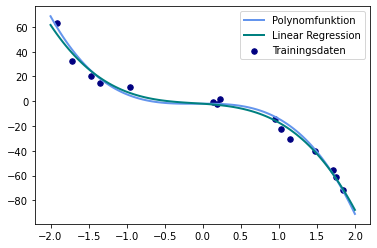

In [10]:
#
plt.plot(x_plot, f(x_plot), color=colors[0], linewidth=lw, label="Polynomfunktion")
#
plt.scatter(X, y, color=colors[1], s=30, marker='o', label="Trainingsdaten")
#
# linear regression
#
polynomial_features = PolynomialFeatures(degree=degree_polyfit)
#
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", LinearRegression())])
#
pipeline.fit(X,y)
LinPlot = pipeline.predict(X_plot)
#
plt.plot(x_plot, LinPlot, color=colors[2], linewidth=lw, label="Linear Regression")
plt.legend()
plt.show()

Regressionskurve mit 'polyfit'

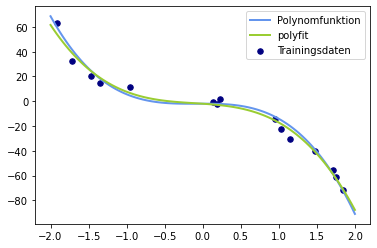

In [11]:
import warnings
from numpy import RankWarning
#
plt.plot(x_plot, f(x_plot), color=colors[0], linewidth=lw, label="Polynomfunktion")
#
plt.scatter(X, y, color=colors[1], s=30, marker='o', label="Trainingsdaten")
#
# poly fitting
p = poly1d(polyfit(X[:,0], y, degree_polyfit))

plt.plot(x_plot, p(x_plot), color=colors[3], lw=lw, label="polyfit")
#
plt.legend()
plt.show()

Regressionskurve mit Ridge-Regression

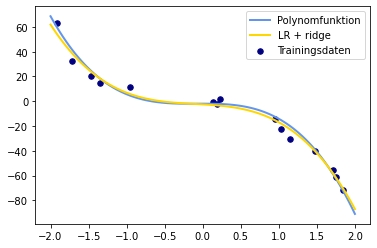

In [12]:
#
plt.plot(x_plot, f(x_plot), color=colors[0], linewidth=lw, label="Polynomfunktion")
#
plt.scatter(X, y, color=colors[1], s=30, marker='o', label="Trainingsdaten")
#
#LR + ridge
LR_ridge = Pipeline([("polynomial_features", PolynomialFeatures(degree=degree_polyfit, include_bias=False)),
                         ("linear_regression", Ridge(alpha=alpha_ridge))
                    ])
LR_ridge.fit(X,y)
yLR_ridge = LR_ridge.predict(X_plot)
#
plt.plot(X_plot, yLR_ridge, color=colors[4],lw=lw,label="LR + ridge")
plt.legend()
plt.show()

Regressionskurve mit Lasso

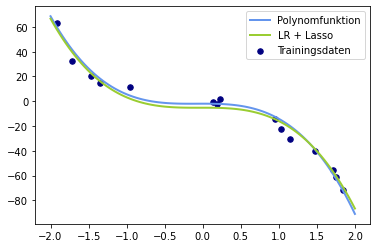

In [13]:
#
plt.plot(x_plot, f(x_plot), color=colors[0], linewidth=lw, label="Polynomfunktion")
#
plt.scatter(X, y, color=colors[1], s=30, marker='o', label="Trainingsdaten")
#

#LR + lasso
pf = PolynomialFeatures(degree=degree_polyfit, include_bias=False)
ls = Lasso(alpha=alpha_lasso)

LR_lasso = Pipeline([("polynomial_features", pf), ("linear_regression", ls)])
#
LR_lasso.fit(X,y)
yLR_lasso = LR_lasso.predict(X_plot)
#
plt.plot(X_plot, yLR_lasso, color=colors[3],lw=lw,label="LR + Lasso")
plt.legend()
plt.show()

Diagramm mit allen Regressionskurven

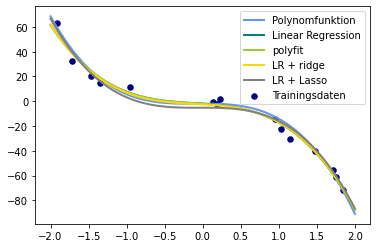

In [14]:
#
plt.plot(x_plot, f(x_plot), color=colors[0], linewidth=lw, label="Polynomfunktion")
#
plt.scatter(X, y, color=colors[1], s=30, marker='o', label="Trainingsdaten")
#
# linear regression
#
polynomial_features = PolynomialFeatures(degree=degree_polyfit)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", LinearRegression())])
#
pipeline.fit(X,y)
LinPlot = pipeline.predict(X_plot)
plt.plot(x_plot, LinPlot, color=colors[2], linewidth=lw, label="Linear Regression")
#
# poly fitting
polyFit = poly1d(polyfit(x, y, degree_polyfit))
plt.plot(x_plot, polyFit(x_plot), color=colors[3], lw=lw, label="polyfit")
#
#LR + ridge
LR_ridge = Pipeline([("polynomial_features", PolynomialFeatures(degree=degree_polyfit)),
                         ("linear_regression", Ridge(alpha=alpha_ridge))
                    ])
LR_ridge.fit(X,y)
yLR_ridge = LR_ridge.predict(X_plot)
#
plt.plot(X_plot, yLR_ridge, color=colors[4],lw=lw,label="LR + ridge")
#
#LR + lasso
LR_lasso = Pipeline([("polynomial_features", PolynomialFeatures(degree=degree_polyfit)),
                         ("linear_regression", Lasso(alpha=alpha_lasso))])
LR_lasso.fit(X,y)
yLR_lasso = LR_lasso.predict(X_plot)
#
plt.plot(X_plot, yLR_lasso, color=colors[5],lw=lw,label="LR + Lasso")
plt.legend()
plt.show()
#

<a id="example_6"></a> **Beispiel 6**

Illustration der Überanpassung
Die Polynomfunktion von oben ist wird hier mit zu vielen Polynomfaktoren bestimmt. Das Ergebnis ist in den folgenden Diagrammen zu sehen:

Polynomfunktion:
$y= -10 \cdot x^3 - 2.3 \cdot x^2 + 0.1\cdot x -2$

Anzahl der Trainingspunkte (n_Punkte): $\quad$20<br>
x_ min: $\quad$-2<br>
x_max: $\quad$2<br>
Verzerrung: $\quad$0.5<br>
Alpha-Grat: $\quad$2.5<br>
Alpha-Lasso: $\quad$2.5<br>
Grad Polyfit: $\quad$22<br>

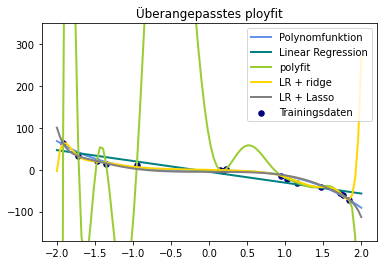

In [15]:
#--------------------------------------------------------------------------
#
# wegen des hohen Grads des polyfits treten Warnungen auf, die ignoriert werden;
import warnings
#
warnings.filterwarnings('ignore')
#
alpha_ridge = 2.5
alpha_lasso = 2.5
degree_polyfit = 17
#
#------------------------------------------------------------------------------
# Kurven anzeigen
#
plt.plot(x_plot, f(x_plot), color=colors[0], linewidth=lw, label="Polynomfunktion")
#
plt.scatter(X, y, color=colors[1], s=30, marker='o', label="Trainingsdaten")
#
# linear regression
#
polynomial_features = PolynomialFeatures(degree=1)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", LinearRegression())])
#
pipeline.fit(X,y)
LinPlot = pipeline.predict(X_plot)
#
# plot redicted data from linear regression:
plt.plot(x_plot, LinPlot, color=colors[2], linewidth=lw, label="Linear Regression")
#
# poly fitting
polyFit = poly1d(polyfit(x, y, degree_polyfit))
plt.plot(x_plot, polyFit(x_plot), color=colors[3], lw=lw, label="polyfit")
#
#LR + ridge
LR_ridge = Pipeline([("polynomial_features", PolynomialFeatures(degree=degree_polyfit)),
                         ("linear_regression", Ridge(alpha=alpha_ridge))
                    ])
LR_ridge.fit(X,y)
yLR_ridge = LR_ridge.predict(X_plot)
#
plt.plot(X_plot, yLR_ridge, color=colors[4],lw=lw,label="LR + ridge")
#
#LR + lasso
LR_lasso = Pipeline([("polynomial_features", PolynomialFeatures(degree=degree_polyfit)),
                         ("linear_regression", Lasso(alpha=alpha_lasso))])
LR_lasso.fit(X,y)
yLR_lasso = LR_lasso.predict(X_plot)
#
plt.plot(X_plot, yLR_lasso, color=colors[5], lw=lw, label="LR + Lasso")
plt.ylim([-170, 350])
plt.title("Überangepasstes ployfit")
plt.legend()
plt.show()

Copyright © 2020 IUBH Internationale Hochschule